# **Chapter 15**
## *Advanced Techniques for Complex Time Series*, 

This chapter will introduce more complex time series data that contains multiple seasonal patterns. The chapter includes how such time series data can be decomposed and explores different modeling techniques, including state-space models.


In this chapter, you will explore the following recipes:

* Decomposing time series with multiple seasonal patterns using MSTL
* Forecasting with multiple seasonal patterns using the Unobserved Components Model (UCM)
* Forecasting time series with multiple seasonal patterns using Prophet
* Forecasting time series with multiple seasonal patterns using NeuralProphet (**See Chapter 15 - NeuralProphet** notebook)

# Technical Requirements

In [1]:
# %config Completer.use_jedi = False
#!conda install pandas matplotlib 
#!pip install pandas matplotlib 

For the latest version of statsmodels

In [2]:
#!pip install git+https://github.com/statsmodels/statsmodels

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

In [4]:
###### configurations for image quality#######
plt.rcParams["figure.figsize"] = [14, 4]   ##
# plt.rcParams['figure.dpi'] = 300           ## 300 for printing
plt.rc('font', size=8)                     ## 
plt.rc('axes', titlesize=16)               ## 
plt.rc('axes', labelsize=14)               ##
plt.rc('xtick', labelsize=10)              ##
plt.rc('ytick', labelsize=10)              ##
plt.rc('legend', fontsize=10)              ##
plt.rc('figure', titlesize=12)             ## 
#############################################

In [5]:
import statsmodels as sm
from statsmodels.tools.eval_measures import rmse, rmspe
print(f'''
statsmodels -> {sm.__version__}
''')


statsmodels -> 0.14.0.dev419+gef5d57a8d



In [6]:
folder = Path('../../datasets/Ch15/')
file = folder.joinpath('AEP_hourly.csv')

df = pd.read_csv(file, index_col='Datetime', parse_dates=True)
df.sort_index(inplace=True)
df = df.resample('H').max()
df.columns = ['y']
df.ffill(inplace=True)

In [7]:
df.isna().sum()

y    0
dtype: int64

In [8]:
df.shape

(121296, 1)

In [9]:
set(df.index.year)

{2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018}

<AxesSubplot:xlabel='Datetime'>

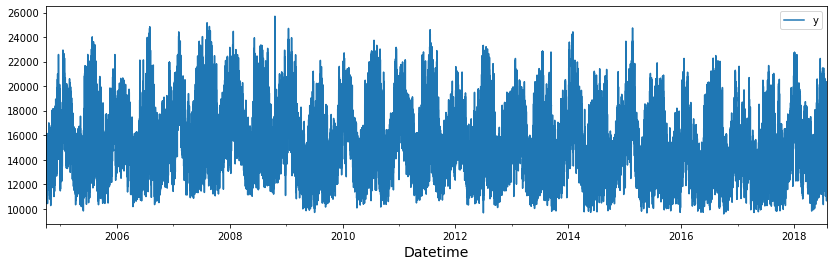

In [10]:
df.plot()

# Decomposing Time Series with Multiple Seasonality using MSTL

The authors initially implemented the paper referenced earlier in R language as the mstl function in the forecast package. In Python, the algorithm is implemented in statsmodel as the MSTL class. At the time of writing, the `MSTL` class is only available in the **development version** of statsmodels, which is the `0.14.0` version. The current stable version is 0.13.2. The following instructions will show you how to install the development version.

It is highly advised that you create a separate virtual environment for Python. If you need a quick refresher on creating a virtual Python environment, check out the *Development
environment setup* recipe from **Chapter 1**, *Getting Started with Time Series Analysis*.

* You can install with `pip` using the following command:

```
pip install git+https://github.com/statsmodels/statsmodels
```

In [11]:
day = 24
week = day*7
month = round(week*4.35)
year = round(month*12)
print(f'''
day = {day} hours
week = {week} hours
month = {month} hours
year = {year} hours
''')


day = 24 hours
week = 168 hours
month = 731 hours
year = 8772 hours



In [12]:
from statsmodels.tsa.seasonal import MSTL
plt.rcParams["figure.figsize"] = [14, 8]

In [13]:
df.index.freq

<Hour>

In [14]:
mstl = MSTL(df, periods=(24, 24*7))
results = mstl.fit()

<bound method Figure.tight_layout of <Figure size 1008x576 with 5 Axes>>

<Figure size 1008x576 with 0 Axes>

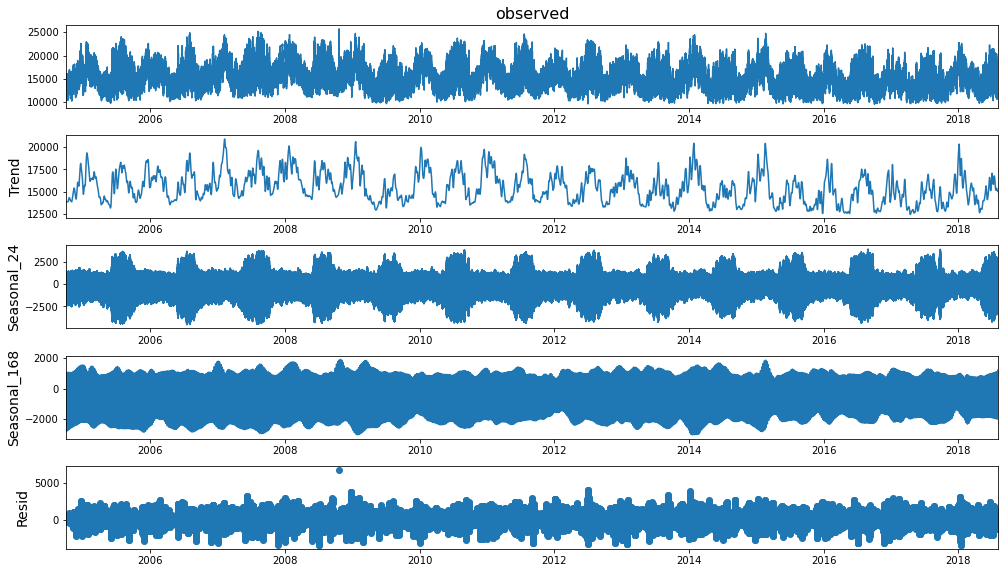

In [15]:
plt.figure(figsize=(14, 8))
ax = results.plot()
ax.tight_layout

In [16]:
# df.loc['2016-01-04':'2016-01-06'].index.day_name()

In [17]:
# df.loc['2016-07-04':'2016-07-06'].index.day_name()

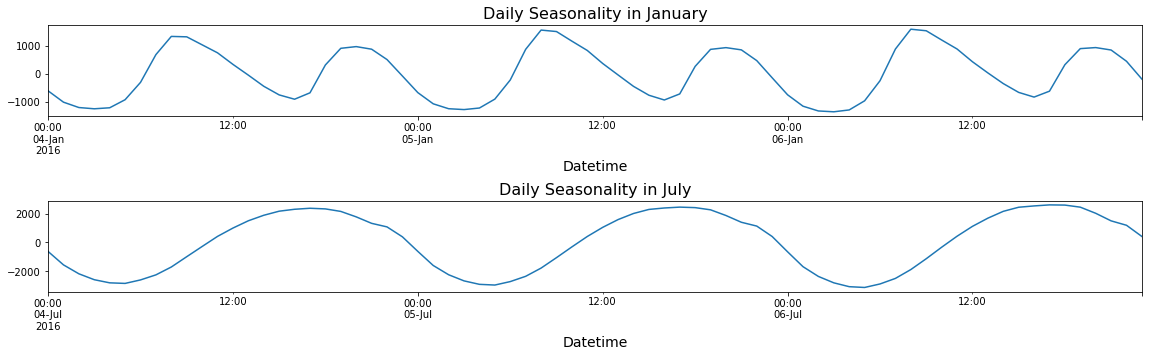

In [18]:
# mask = results.seasonal.index.month==7
fig, ax = plt.subplots(2, 1, figsize=(16, 5))
(results.seasonal['seasonal_24']
         .loc['2016-01-04':'2016-01-06']
         .plot(ax=ax[0], 
               title='Daily Seasonality in January'))
(results.seasonal['seasonal_24']
         .loc['2016-07-04':'2016-07-06']
         .plot(ax=ax[1], 
               title='Daily Seasonality in July'))
fig.tight_layout(); plt.show()

In [19]:
# df.loc['2016-01-04':'2016-01-10'].index.day_name()

In [20]:
# df.loc['2016-01-04':'2016-01-10'].index.day_name()

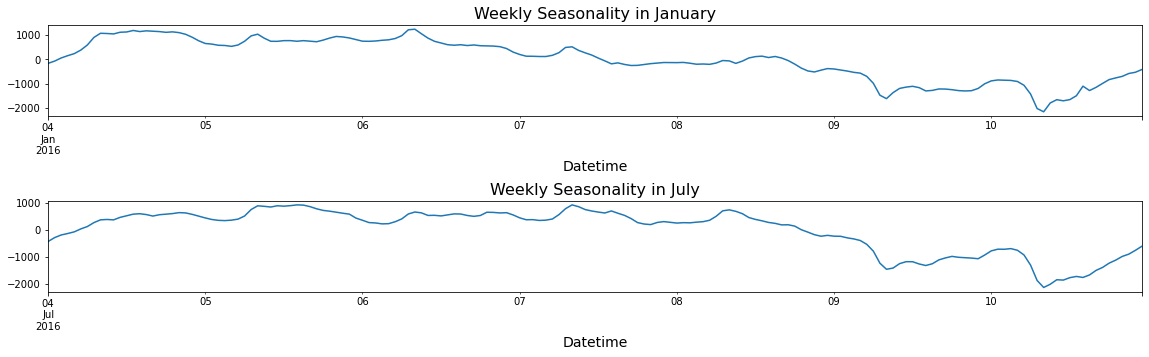

In [21]:
# mask = results.seasonal.index.month==7
fig, ax = plt.subplots(2, 1, figsize=(16, 5))
(results.seasonal['seasonal_168']
         .loc['2016-01-04':'2016-01-10']
         .plot(ax=ax[0], 
               title='Weekly Seasonality in January'))
(results.seasonal['seasonal_168']
         .loc['2016-07-04':'2016-07-10']
         .plot(ax=ax[1], 
               title='Weekly Seasonality in July'))
fig.tight_layout(); plt.show()

## There is more

In [22]:
df.head()

,y
Datetime,
2004-10-01 01:00:00,12379.0
2004-10-01 02:00:00,11935.0
2004-10-01 03:00:00,11692.0
2004-10-01 04:00:00,11597.0
2004-10-01 05:00:00,11681.0


Note: Running time will be slower in the following example

defult values for windows

In [23]:
n = 2
7 + 4 * np.arange(1, n + 1, 1)

array([11, 15])

In [24]:
mstl = MSTL(df, periods=(24, 24*7), iterate=4, windows=[121, 121])
results = mstl.fit()

In [25]:
# mstl = MSTL(df, periods=(day, week, year))
# results = mstl.fit()

In [26]:
results.seasonal

,seasonal_24,seasonal_168
Datetime,,
2004-10-01 01:00:00,-1679.480941,310.793623
2004-10-01 02:00:00,-2118.502842,305.601582
2004-10-01 03:00:00,-2366.747343,300.390028
2004-10-01 04:00:00,-2436.134303,315.263059
2004-10-01 05:00:00,-2328.267260,356.349291
...,...,...
2018-08-02 20:00:00,2474.844589,387.676073
2018-08-02 21:00:00,1734.443244,389.830116
2018-08-02 22:00:00,1239.335395,406.616123


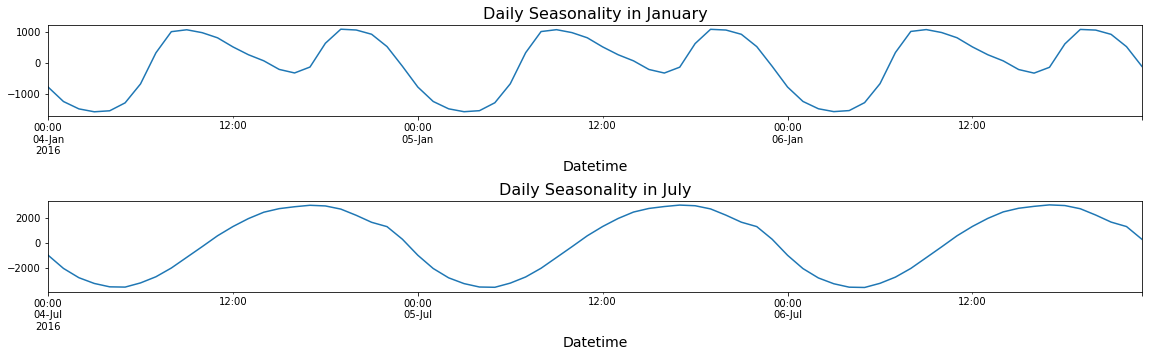

In [27]:
fig, ax = plt.subplots(2, 1, figsize=(16, 5))
(results.seasonal['seasonal_24']
         .loc['2016-01-04':'2016-01-06']
         .plot(ax=ax[0], 
               title='Daily Seasonality in January'))
(results.seasonal['seasonal_24']
         .loc['2016-07-04':'2016-07-06']
         .plot(ax=ax[1], 
               title='Daily Seasonality in July'))
fig.tight_layout(); plt.show()

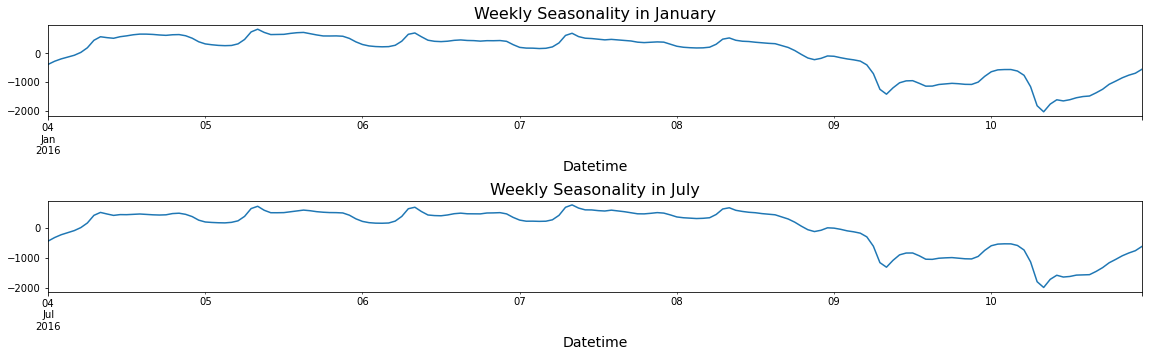

In [28]:
fig, ax = plt.subplots(2, 1, figsize=(16, 5))
(results.seasonal['seasonal_168']
         .loc['2016-01-04':'2016-01-10']
         .plot(ax=ax[0], 
               title='Weekly Seasonality in January'))
(results.seasonal['seasonal_168']
         .loc['2016-07-04':'2016-07-10']
         .plot(ax=ax[1], 
               title='Weekly Seasonality in July'))
fig.tight_layout(); plt.show()

# Forecasting Time Series with Multiple Seasonality Unobserved Components using (UCM)

In [29]:
from statsmodels.tsa.statespace.structural import UnobservedComponents
plt.rcParams["figure.figsize"] = [14, 4]

In [30]:
pd.date_range('2004-10-01 01:00:00', '2018-08-03 00:00:00', freq='H')

DatetimeIndex(['2004-10-01 01:00:00', '2004-10-01 02:00:00',
               '2004-10-01 03:00:00', '2004-10-01 04:00:00',
               '2004-10-01 05:00:00', '2004-10-01 06:00:00',
               '2004-10-01 07:00:00', '2004-10-01 08:00:00',
               '2004-10-01 09:00:00', '2004-10-01 10:00:00',
               ...
               '2018-08-02 15:00:00', '2018-08-02 16:00:00',
               '2018-08-02 17:00:00', '2018-08-02 18:00:00',
               '2018-08-02 19:00:00', '2018-08-02 20:00:00',
               '2018-08-02 21:00:00', '2018-08-02 22:00:00',
               '2018-08-02 23:00:00', '2018-08-03 00:00:00'],
              dtype='datetime64[ns]', length=121296, freq='H')

### Splitting the data

In [31]:
train = df.iloc[:-month]
test = df.iloc[-month:]

In [32]:
train

,y
Datetime,
2004-10-01 01:00:00,12379.0
2004-10-01 02:00:00,11935.0
2004-10-01 03:00:00,11692.0
2004-10-01 04:00:00,11597.0
2004-10-01 05:00:00,11681.0
...,...
2018-07-03 09:00:00,15838.0
2018-07-03 10:00:00,16991.0
2018-07-03 11:00:00,18207.0


In [33]:
test

,y
Datetime,
2018-07-03 14:00:00,20999.0
2018-07-03 15:00:00,21321.0
2018-07-03 16:00:00,21367.0
2018-07-03 17:00:00,21481.0
2018-07-03 18:00:00,21448.0
...,...
2018-08-02 20:00:00,17673.0
2018-08-02 21:00:00,17303.0
2018-08-02 22:00:00,17001.0


In [34]:
print(len(df))
print(len(train))
print(len(test))
print(len(test)/len(df.loc['2013':])*100)

121296
120565
731
1.4930250607626478


In [35]:
len(test) + len(train) == len(df)

True

<AxesSubplot:xlabel='Datetime'>

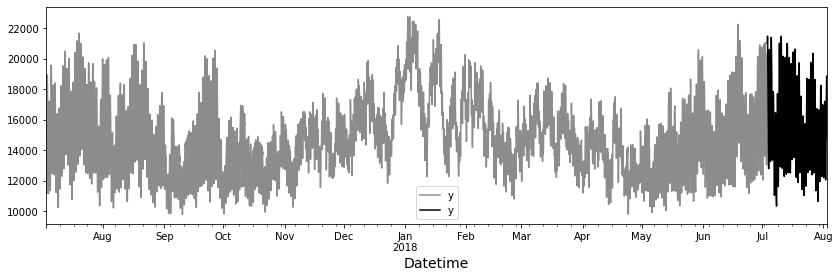

In [36]:
ax = train.iloc[-year:].plot(style='k-', alpha=0.45)
test.plot(ax=ax, style='k')

<AxesSubplot:xlabel='Datetime'>

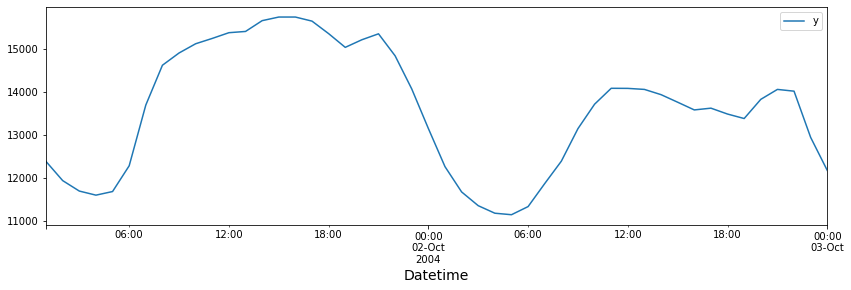

In [37]:
train.iloc[:day*2].plot()

<AxesSubplot:xlabel='Datetime'>

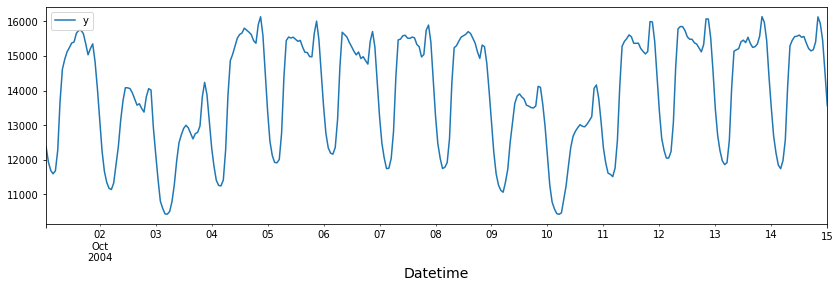

In [38]:
train.iloc[:week*2].plot()

<AxesSubplot:xlabel='Datetime'>

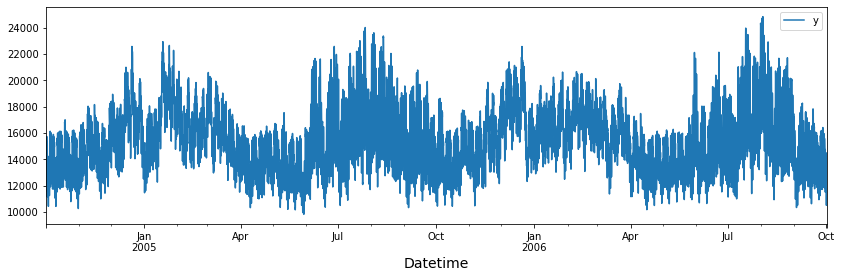

In [39]:
train.iloc[:year*2].plot()

### UCM Model

In [40]:
params = {'level':'dtrend',
        'irregular':True,
        'freq_seasonal':[{'period': day, 'harmonics':2},
                        {'period': week, 'harmonics':2},
                        {'period': year, 'harmonics':2}],
        'stochastic_freq_seasonal':[False, False, False]}

model = UnobservedComponents(train, **params)
                                        

results = model.fit()

/Users/tarekatwan/opt/anaconda3/envs/ch15/lib/python3.9/site-packages/statsmodels/tsa/statespace/structural.py:426: SpecificationWarning: Value of `irregular` may be overridden when the trend component is specified using a model string.
  warn("Value of `%s` may be overridden when the trend"


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.85326D+00    |proj g|=  1.90991D-04


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      3      6      1     0     0   7.570D-06   8.837D+00
  F =   8.8366388516081393     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [41]:
results

In [42]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Unobserved Components Results                            
====================================================================================
Dep. Variable:                            y   No. Observations:               120565
Model:                  deterministic trend   Log Likelihood            -1065389.363
                     + freq_seasonal(24(2))   AIC                        2130780.726
                    + freq_seasonal(168(2))   BIC                        2130790.426
                   + freq_seasonal(8772(2))   HQIC                       2130783.645
Date:                      Mon, 06 Jun 2022                                         
Time:                              05:54:06                                         
Sample:                          10-01-2004                                         
                               - 07-03-2018                                         
Covariance Type:                        opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  2.735e+06   1.01e+04    271.462      0.000    2.72e+06    2.75e+06
===================================================================================
Ljung-Box (L1) (Q):              114494.70   Jarque-Bera (JB):              6780.07
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.11   Skew:                             0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Model Performance and Analysis

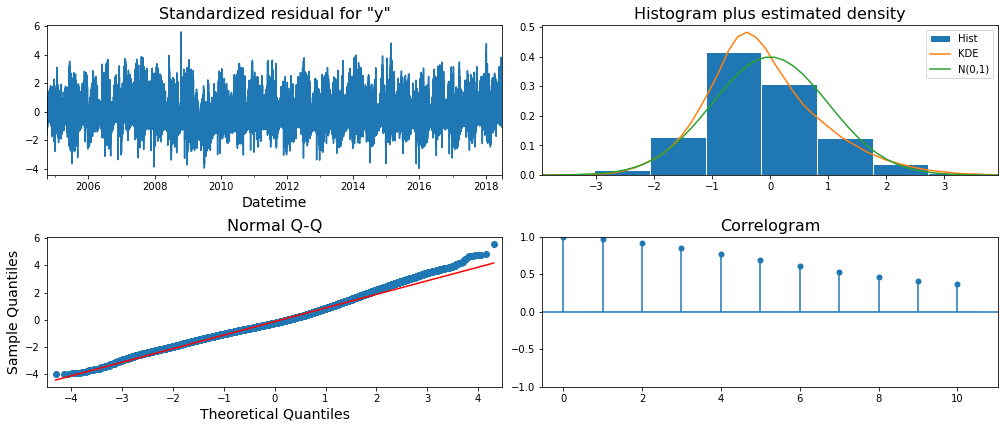

In [43]:
fig = results.plot_diagnostics(figsize=(14, 6))
fig.tight_layout()

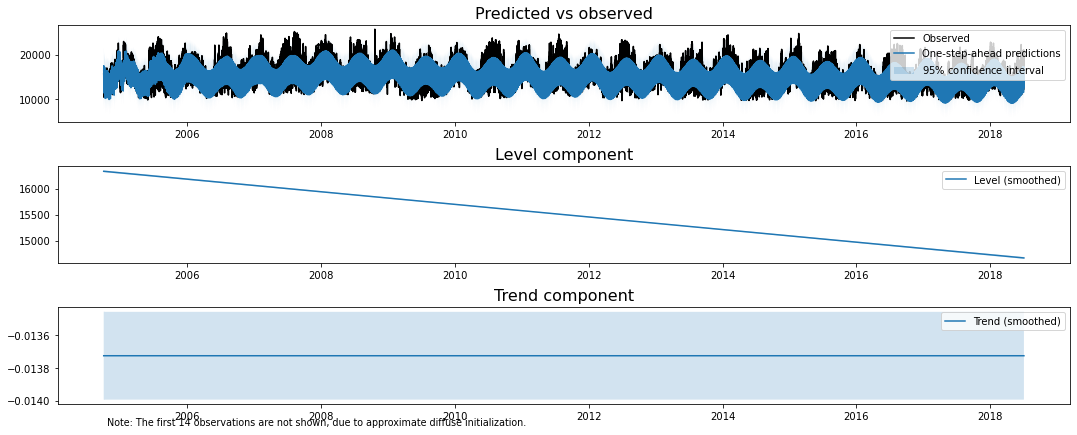

In [44]:
fig = results.plot_components(figsize=(15, 6), 
                              freq_seasonal=False, 
                              which='smoothed')
fig.tight_layout()

available `.fit()` methods. Default is `lbfgs`
```
    'newton' for Newton-Raphson
    'nm' for Nelder-Mead
    'bfgs' for Broyden-Fletcher-Goldfarb-Shanno (BFGS)
    'lbfgs' for limited-memory BFGS with optional box constraints
    'powell' for modified Powell's method
    'cg' for conjugate gradient
    'ncg' for Newton-conjugate gradient
    'basinhopping' for global basin-hopping solver
 ```

In [45]:
len(results.freq_seasonal)

3

In [46]:
len(results.freq_seasonal[0])

6

In [47]:
results.freq_seasonal[1].keys()

dict_keys(['filtered', 'filtered_cov', 'smoothed', 'smoothed_cov', 'offset', 'pretty_name'])

In [48]:
results.freq_seasonal[0]['smoothed'].shape

(120565,)

In [49]:
train.shape

(120565, 1)

<AxesSubplot:title={'center':'Daily Seasonality'}, xlabel='hour_of_day'>

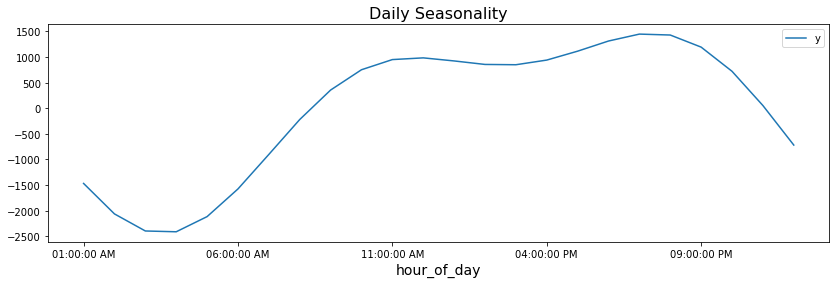

In [50]:
daily = pd.DataFrame(results.freq_seasonal[0]['smoothed'], 
                        index=train.index, columns=['y']).iloc[:day]
daily['hour_of_day'] = daily.index.strftime(date_format = '%I:%M:%S %p')
daily.plot(y='y', x='hour_of_day', title='Daily Seasonality')

<AxesSubplot:title={'center':'Weekly Seasonality'}, xlabel='day_name'>

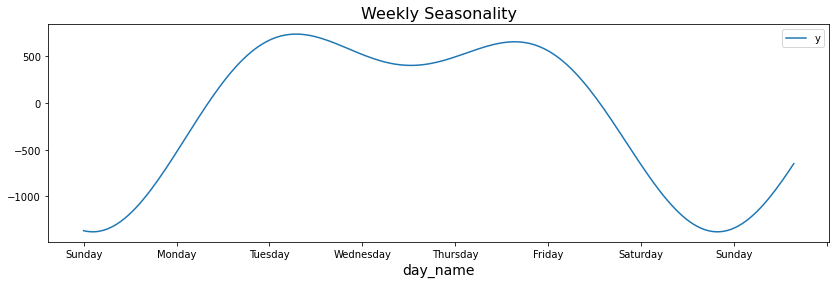

In [51]:
weekly = pd.DataFrame(results.freq_seasonal[1]['smoothed'], 
                         index=train.index, columns=['y']).loc['2004-10-03': '2004-10-10']
weekly['day_name'] = weekly.index.strftime(date_format = '%A')
weekly.plot(y='y', x='day_name', title='Weekly Seasonality')

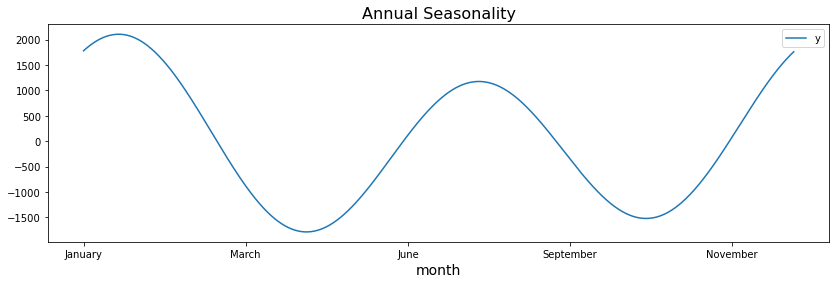

In [52]:
annual = pd.DataFrame(results.freq_seasonal[2]['smoothed'], 
                         index=train.index, columns=['y']).loc['2005']
annual['month'] = annual.index.strftime(date_format = '%B')
ax = annual.plot(y='y', x='month', title='Annual Seasonality')

In [53]:
results.freq_seasonal[2]

{'filtered': array([2543.20502481, 2869.82021673, 2918.891212  , ...,  712.84481574,
         714.4877374 ,  716.16515312]),
 'filtered_cov': array([1.79455489e+06, 1.76456792e+06, 1.75943566e+06, ...,
        9.08111510e+01, 9.08103875e+01, 9.08096239e+01]),
 'smoothed': array([-1305.19736828, -1306.32176278, -1307.44352105, ...,
          713.02606408,   714.59671224,   716.16515312]),
 'smoothed_cov': array([90.80963149, 90.80889992, 90.80816836, ..., 90.80816073,
        90.8088923 , 90.80962387]),
 'offset': 10,
 'pretty_name': 'seasonal 8772(2)'}

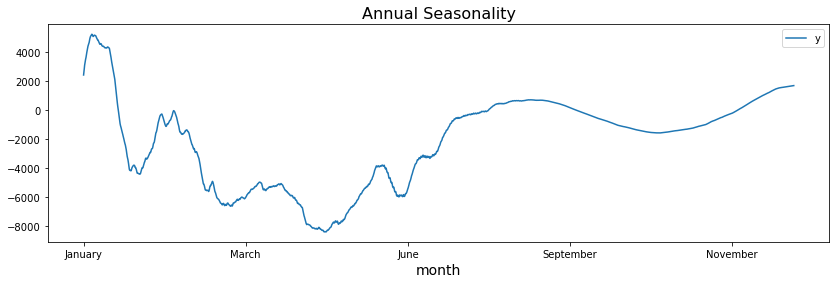

In [54]:
annual = pd.DataFrame(results.freq_seasonal[2]['filtered'], 
                         index=train.index, columns=['y']).loc['2005']
annual['month'] = annual.index.strftime(date_format = '%B')
ax = annual.plot(y='y', x='month', title='Annual Seasonality')

In [55]:
prediction = results.predict(start=test.index.min(), 
                end=test.index.max())

Text(0.5, 1.0, 'Out-of-Sample Forecast: Actual vs Predicted')

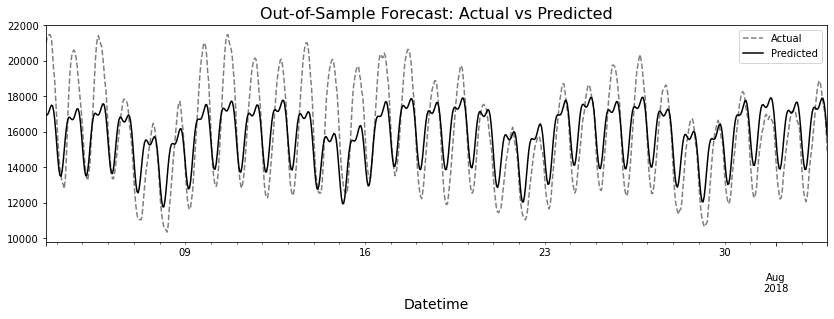

In [56]:
test.plot(style='k--', alpha=0.5)
prediction.plot(style='k')
plt.legend(['Actual', 'Predicted'])
plt.title('Out-of-Sample Forecast: Actual vs Predicted')

In [57]:
rmspe(test['y'], prediction)

1.0676342723616299

In [58]:
rmse(test['y'], prediction)

1716.1196102348363

## There is more

In [59]:
params = {'level':'dtrend',
        'irregular':True,
        'freq_seasonal':[{'period': day, 'harmonics':1},
                        {'period': week, 'harmonics':1},
                        {'period': year, 'harmonics':1}],
        'stochastic_freq_seasonal':[False, False, False]}

model = UnobservedComponents(train, **params)
                                        

results = model.fit()

/Users/tarekatwan/opt/anaconda3/envs/ch15/lib/python3.9/site-packages/statsmodels/tsa/statespace/structural.py:426: SpecificationWarning: Value of `irregular` may be overridden when the trend component is specified using a model string.
  warn("Value of `%s` may be overridden when the trend"


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.26260D+00    |proj g|=  7.47534D-04


 This problem is unconstrained.



At iterate    5    f=  9.08381D+00    |proj g|=  4.14158D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      5      9      1     0     0   4.142D-06   9.084D+00
  F =   9.0838130347526764     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [60]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Unobserved Components Results                            
====================================================================================
Dep. Variable:                            y   No. Observations:               120565
Model:                  deterministic trend   Log Likelihood            -1095189.919
                     + freq_seasonal(24(1))   AIC                        2190381.837
                    + freq_seasonal(168(1))   BIC                        2190391.537
                   + freq_seasonal(8772(1))   HQIC                       2190384.756
Date:                      Mon, 06 Jun 2022                                         
Time:                              05:54:23                                         
Sample:                          10-01-2004                                         
                               - 07-03-2018                                         
Covariance Type:                        opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  4.499e+06   1.91e+04    235.162      0.000    4.46e+06    4.54e+06
===================================================================================
Ljung-Box (L1) (Q):              114635.01   Jarque-Bera (JB):              6447.07
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                             0.56
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

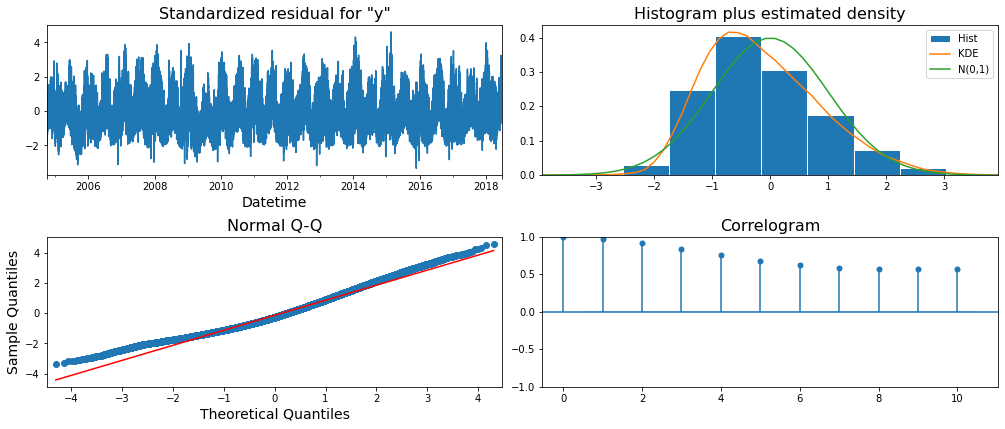

In [61]:
fig = results.plot_diagnostics(figsize=(14, 6))
fig.tight_layout()

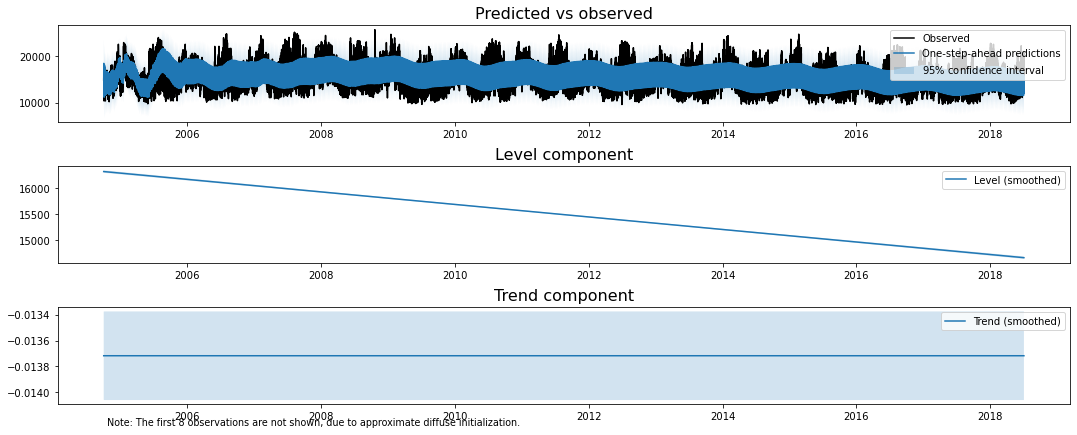

In [62]:
fig = results.plot_components(figsize=(15, 6), 
                              freq_seasonal=False, 
                              which='smoothed')
fig.tight_layout()

<AxesSubplot:title={'center':'Daily Seasonality'}, xlabel='hour_of_day'>

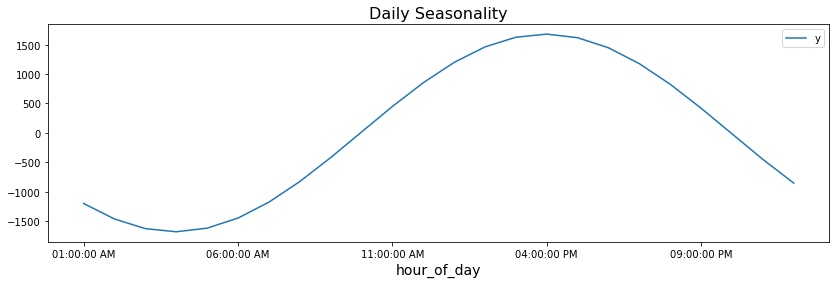

In [63]:
daily = pd.DataFrame(results.freq_seasonal[0]['smoothed'], 
                        index=train.index, columns=['y']).iloc[:day]
daily['hour_of_day'] = daily.index.strftime(date_format = '%I:%M:%S %p')
daily.plot(y='y', x='hour_of_day', title='Daily Seasonality')

<AxesSubplot:title={'center':'Weekly Seasonality'}, xlabel='day_name'>

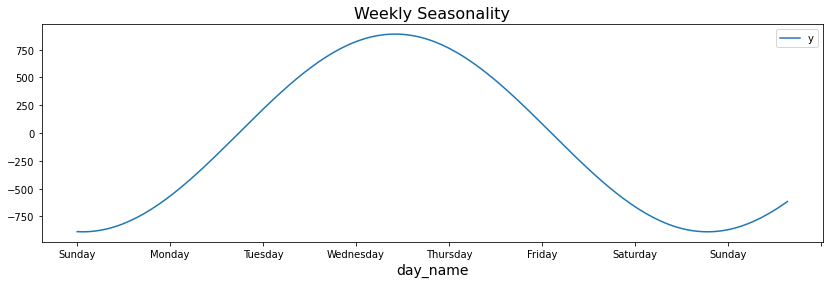

In [64]:
weekly = pd.DataFrame(results.freq_seasonal[1]['smoothed'], 
                         index=train.index, columns=['y']).loc['2004-10-03': '2004-10-10']
weekly['day_name'] = weekly.index.strftime(date_format = '%A')
weekly.plot(y='y', x='day_name', title='Weekly Seasonality')

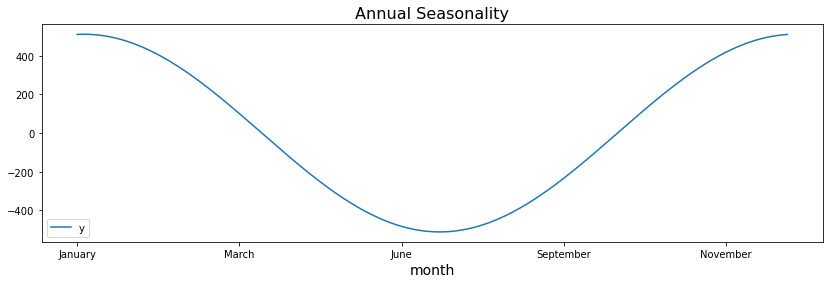

In [65]:
annual = pd.DataFrame(results.freq_seasonal[2]['smoothed'], 
                         index=train.index, columns=['y']).loc['2005']
annual['month'] = annual.index.strftime(date_format = '%B')
ax = annual.plot(y='y', x='month', title='Annual Seasonality')

In [66]:
prediction = results.predict(start=test.index.min(), 
                end=test.index.max())

Text(0.5, 1.0, 'Out-of-Sample Forecast: Actual vs Predicted')

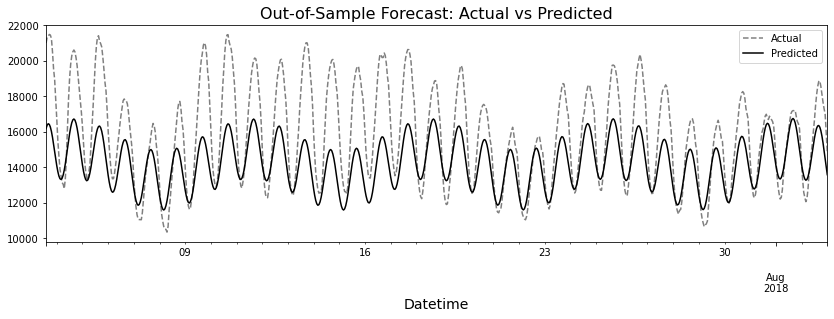

In [67]:
test.plot(style='k--', alpha=0.5)
prediction.plot(style='k')
plt.legend(['Actual', 'Predicted'])
plt.title('Out-of-Sample Forecast: Actual vs Predicted')

In [68]:
rmspe(test['y'], prediction)

1.271709113295109

In [69]:
rmse(test['y'], prediction)

2336.305516194162

# Using Prophet

In [1]:
# import warnings

# warnings.filterwarnings('ignore')

In [71]:

from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

Importing plotly failed. Interactive plots will not work.


In [72]:
# uncomment below if you need to reload the data set

# import pandas as pd
# from pathlib import Path


# day = 24
# week = day*7
# month = round(week*4.35)
# year = round(month*12)
# print(f'''
# day = {day} hours
# week = {week} hours
# month = {month} hours
# year = {year} hours
# ''')


# folder = Path('../../datasets/Ch15/')
# file = folder.joinpath('AEP_hourly.csv')

# df = pd.read_csv(file, index_col='Datetime', parse_dates=True)
# df.sort_index(inplace=True)
# df = df.resample('H').max()
# df.columns = ['y']
# df.ffill(inplace=True)

In [73]:
df.shape

(121296, 1)

In [74]:
energy = df.copy()

In [75]:
energy.reset_index(inplace=True)
energy.columns = ['ds', 'y']

In [76]:
train = energy.iloc[:-month]
test = energy.iloc[-month:]

### Prophet Model

In [77]:
model = Prophet().fit(train)

Initial log joint probability = -1366.71
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        275236     0.0735659       20198.8           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        275795     0.0102461       7020.54      0.9396      0.9396      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        276058     0.0251783       10810.9           1           1      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        276214    0.00716067       2659.17           1           1      467   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        276357    0.00119094       5021.96      0.1476           1      581   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [78]:
n = len(test)
future = model.make_future_dataframe(n, freq='H')

In [79]:
future

,ds
0,2004-10-01 01:00:00
1,2004-10-01 02:00:00
2,2004-10-01 03:00:00
3,2004-10-01 04:00:00
4,2004-10-01 05:00:00
...,...
121291,2018-08-02 20:00:00
121292,2018-08-02 21:00:00
121293,2018-08-02 22:00:00
121294,2018-08-02 23:00:00


In [80]:
forecast = model.predict(future)

In [81]:
model

### Model Performance and Analysis

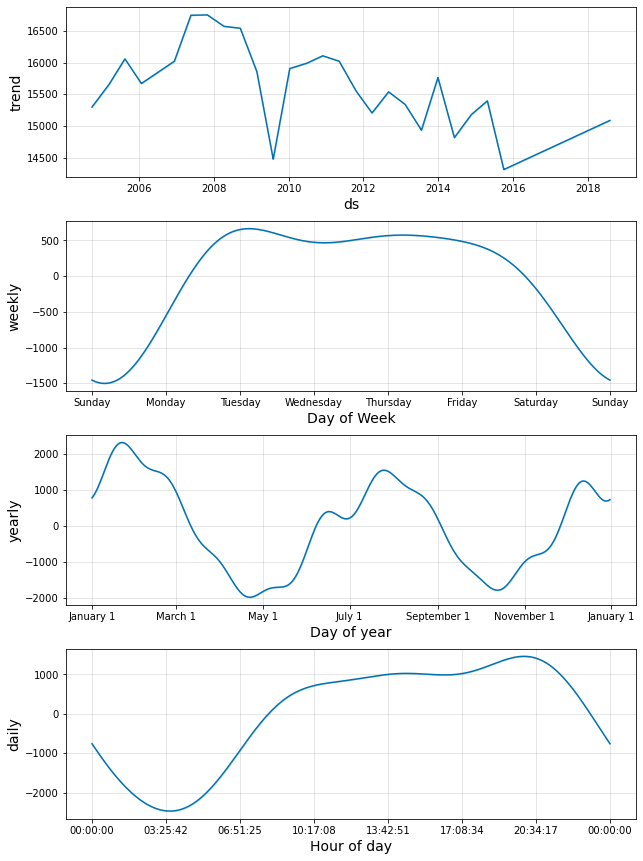

In [82]:
model.plot_components(forecast); plt.show()

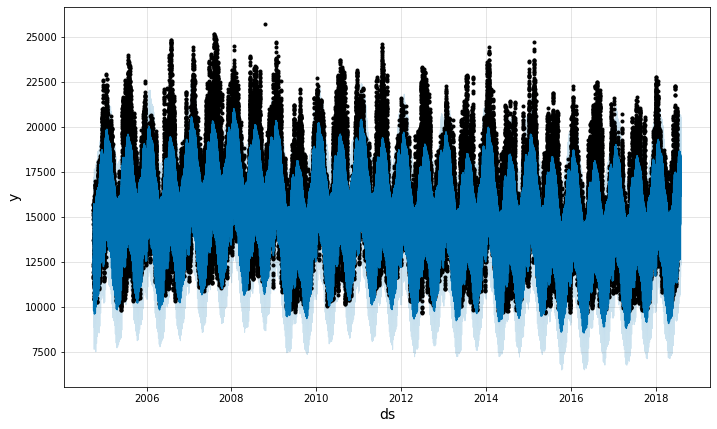

In [83]:
model.plot(forecast);plt.show()

In [84]:
prediction = forecast.iloc[test.index[0]:].set_index('ds')['yhat']

Text(0.5, 1.0, 'Out-of-Sample Forecast: Actual vs Predicted')

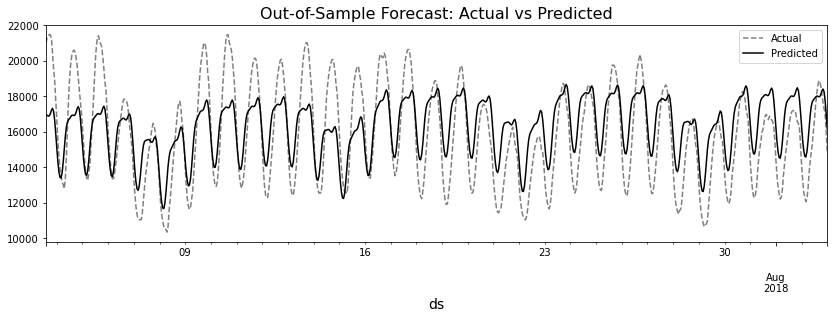

In [85]:
test.set_index('ds').plot(style='k--', alpha=0.5)
prediction.plot(style='k')
plt.legend(['Actual', 'Predicted'])
plt.title('Out-of-Sample Forecast: Actual vs Predicted')

In [86]:
rmspe(test['y'].values, prediction.values)

1.2587190915113151

In [87]:
rmse(test['y'].values, prediction.values)

1885.143242946697

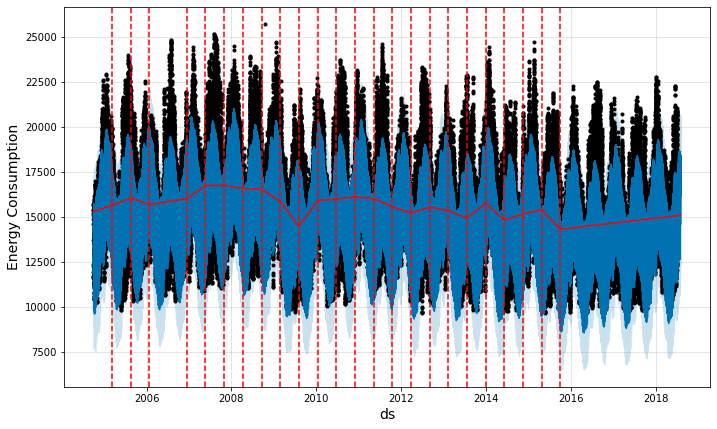

In [88]:
fig = model.plot(forecast, ylabel='Energy Consumption')
add_changepoints_to_plot(fig.gca(), model, forecast, threshold=0.01)
plt.show()